# AIM 5001 Project 4 
Jesus Olivera, Pujita Ravichandar, Benjamin Freund

## Introduction

The purpose of this project is to analyze data related to mushrooms. With the analysis we seek to understand which variables can be best associated with a mushroom's edibility and which variables are better associated with poisonous mushrooms. The main goal of our project is to build a predictive model that can be used to determine if mushrooms are edible or poisonous.

### Research Questions

1. Which other attribute (i.e., aside from the poisonous/edible indicator) or attributes are the best predictors of whether a particular mushroom is poisonous or edible?


## Dataset Preparation
 
### Data Summary
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.<br> 

**Dataset link:** https://archive.ics.uci.edu/ml/datasets/mushroom

In [19]:
# Importing all necessary packages
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Importing data from Github
read = pd.read_csv("https://raw.githubusercontent.com/jaynuel/AIM-5001/master/data_project4.data", header=None)

# Confirming data was loaded properly
read.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Phase I: Data Acquisition, Data Preparation, and Exploratory Data Analysis

### Data Acquisition and Preparation
To preform data analysis on this dataset, it must first be converted into a workable format. We have chosen to work with the odor, spore color, and habitat of the mushrooms in this dataset. The poisonous and edible variable are converted into '0' and '1' respectively. The rest of the columns are onverted into dummy variables stored as numerics. The code detailing this is along with the dataframes are below.

In [20]:
# Selecting data for the analysis
df = read.iloc[:, [0,5,20,22]].copy()

df.head(5)

,0,5,20,22
0,p,p,k,u
1,e,a,n,g
2,e,l,n,m
3,p,p,k,u
4,e,n,n,g


In [21]:
# Updating the column titles for a more intuitive analysis 
df.columns = ['Edible','Odor','Spore_Color','Habitat']

df.head(5)

,Edible,Odor,Spore_Color,Habitat
0,p,p,k,u
1,e,a,n,g
2,e,l,n,m
3,p,p,k,u
4,e,n,n,g


In [22]:
# Converting the "e" and "p" indicators to digits
df.Edible.replace('e', 1, inplace=True)
df.Edible.replace('p', 0, inplace=True)

df.head(5)

,Edible,Odor,Spore_Color,Habitat
0,0,p,k,u
1,1,a,n,g
2,1,l,n,m
3,0,p,k,u
4,1,n,n,g


In [23]:
# Creating a set of dummy variables for each column in the dataframe
df1= pd.get_dummies(df, columns=['Odor','Spore_Color','Habitat'])

df1.head(5)

,Edible,Odor_a,Odor_c,Odor_f,Odor_l,Odor_m,Odor_n,Odor_p,Odor_s,Odor_y,...,Spore_Color_u,Spore_Color_w,Spore_Color_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
# Statistical analysis
df1.describe().round(4)

,Edible,Odor_a,Odor_c,Odor_f,Odor_l,Odor_m,Odor_n,Odor_p,Odor_s,Odor_y,...,Spore_Color_u,Spore_Color_w,Spore_Color_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
count,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,...,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000,8124.0000
mean,0.5180,0.0492,0.0236,0.2659,0.0492,0.0044,0.4343,0.0315,0.0709,0.0709,...,0.0059,0.2939,0.0059,0.3875,0.2644,0.1024,0.0359,0.1408,0.0453,0.0236
std,0.4997,0.2164,0.1519,0.4418,0.2164,0.0664,0.4957,0.1747,0.2567,0.2567,...,0.0766,0.4556,0.0766,0.4872,0.4410,0.3032,0.1862,0.3479,0.2080,0.1519
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Odor

The distribution of the odor variables is below. This boxplot provides the insight that most of the mushrooms in this data set have either no odor or a foul odor. It is also important to note that there are no outliers in the odor data. The boxplot below illustrates the count of the edible vs. poisonous mushroom by odor. The bar graph shows the percentage of mushrooms that fall in the edible. s. poisionous categories. All of the mushrooms with an almond and anise set are 100% edible and 96.5% of the mushrooms with no odor are edible. All of the mushrooms with creosote, foul, musty, pungent, spicy, and fisky odors are fully posisonous.

In [25]:
# Adding and grouping the data by "edible" and "poisonous"
grouped = df1.groupby(['Edible']).sum()

grouped

,Odor_a,Odor_c,Odor_f,Odor_l,Odor_m,Odor_n,Odor_p,Odor_s,Odor_y,Spore_Color_b,...,Spore_Color_u,Spore_Color_w,Spore_Color_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
Edible,,,,,,,,,,,,,,,,,,,,,
0,0.0,192.0,2160.0,0.0,36.0,120.0,256.0,576.0,576.0,0.0,...,0.0,1812.0,0.0,1268.0,740.0,592.0,36.0,1008.0,272.0,0.0
1,400.0,0.0,0.0,400.0,0.0,3408.0,0.0,0.0,0.0,48.0,...,48.0,576.0,48.0,1880.0,1408.0,240.0,256.0,136.0,96.0,192.0


In [26]:
# Selecting mushroom's odor data 
grouped_odor = grouped.iloc[:,0:9]

# Adding meaningful names for each column
O = grouped_odor.rename(columns={'Odor_a':'almond', 'Odor_c':'creosote', 
                                 'Odor_f':'foul', 'Odor_l':'anise', 'Odor_m':'musty', 
                                 'Odor_n':'none', 'Odor_p':'pungent','Odor_s':'spicy', 
                                 'Odor_y':'fishy'}, index={0:'poisonous', 1:'edible'})
O

#append sum of columns as a total row
Otot = O.append(pd.Series(O.sum(),name='Total'))
Otot

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
Edible,,,,,,,,,
poisonous,0.0,192.0,2160.0,0.0,36.0,120.0,256.0,576.0,576.0
edible,400.0,0.0,0.0,400.0,0.0,3408.0,0.0,0.0,0.0
Total,400.0,192.0,2160.0,400.0,36.0,3528.0,256.0,576.0,576.0


In [27]:
#calculate percent edible and poison mushrooms for each odor
edible_percent = Otot.iloc[1].values/Otot.iloc[2].values
poison_percent = Otot.iloc[0].values/Otot.iloc[2].values

#combine into one array
numpy_percent = (edible_percent, poison_percent)

#add percentages to dataframe with appropriate column names
Opercent = pd.DataFrame(data=numpy_percent).rename(columns={0:'almond', 1:'creosote', 2:'foul', 3:'anise', 4:'musty', 5:'none', 6:'pungent',
                                                            7:'spicy', 8:'fishy'})
print(Opercent)

   almond  creosote  foul  anise  musty      none  pungent  spicy  fishy
0     1.0       0.0   0.0    1.0    0.0  0.965986      0.0    0.0    0.0
1     0.0       1.0   1.0    0.0    1.0  0.034014      1.0    1.0    1.0


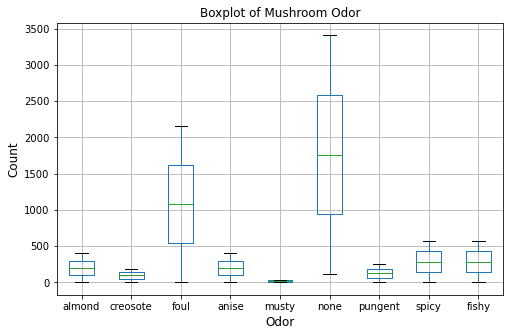

In [28]:
# Odor Boxpot
odor_boxplot = O.boxplot(figsize=(8,5))
odor_boxplot = plt.title('Boxplot of Mushroom Odor', fontsize=12)
odor_boxplot = plt.ylabel('Count', fontsize=12)
odor_boxplot = plt.xlabel('Odor', fontsize=12)

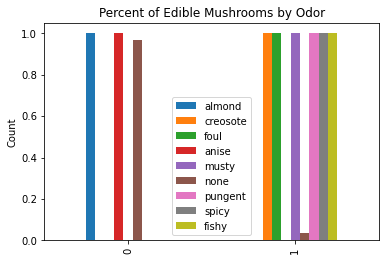

In [29]:
#odor bar graph
odor = Opercent.plot.bar()
odor = plt.title('Percent of Edible Mushrooms by Odor')
odor = plt.ylabel('Count')

### Spore Color

The distribution of the spor color variables is illustrated in the boxplot below. This boxplot provides the insight that the majority of mushrooms in this data set have white, brown, black, or chocolate colored spores. It is also important to note that there are no outliers in this data. The boxplot below depicts the count of the edible vs. poisonous mushroom by spore color. The bar graph below shows the percentage of the mushrooms that fall in the edible vs. poisonous categories. 100% of the green, 97% of the chocolate, 75% of the white, 11% of the black and brown, and 0% of the buff, orange, and purple mushrooms are eidble. 

In [30]:
grouped_spore = grouped.iloc[:,9:18]
S = grouped_spore.rename(columns={'Spore_Color_b':'buff', 'Spore_Color_h':'chocolate', 
                              'Spore_Color_k':'black', 'Spore_Color_n':'brown','Spore_Color_o':'orange',
                              'Spore_Color_r':'green', 'Spore_Color_u':'purple', 'Spore_Color_w':'white',
                              'Spore_Color_y':'yellow'}, index={0:'poisonous',1:'edible'})

S

#append sum of columns as a total row
Stot = S.append(pd.Series(S.sum(),name='Total'))
Stot

,buff,chocolate,black,brown,orange,green,purple,white,yellow
Edible,,,,,,,,,
poisonous,0.0,1584.0,224.0,224.0,0.0,72.0,0.0,1812.0,0.0
edible,48.0,48.0,1648.0,1744.0,48.0,0.0,48.0,576.0,48.0
Total,48.0,1632.0,1872.0,1968.0,48.0,72.0,48.0,2388.0,48.0


In [31]:
#calculate percent edible and poison mushrooms for each spore color
Sedible_percent = Stot.iloc[1].values/Stot.iloc[2].values
Spoison_percent = Stot.iloc[0].values/Stot.iloc[2].values

#combine into one array
Snumpy_percent = (Sedible_percent, Spoison_percent)

#add percentages to dataframe with appropriate column names
Spercent = pd.DataFrame(data=Snumpy_percent).rename(columns={0:'buff', 1:'chocolate', 2:'black', 3:'brown', 
                                                             4:'orange', 5:'green', 6:'purple', 7:'white', 8:'yellow'})

print(Spercent)

   buff  chocolate     black     brown  orange  green  purple     white  \
0   1.0   0.029412  0.880342  0.886179     1.0    0.0     1.0  0.241206   
1   0.0   0.970588  0.119658  0.113821     0.0    1.0     0.0  0.758794   

   yellow  
0     1.0  
1     0.0  


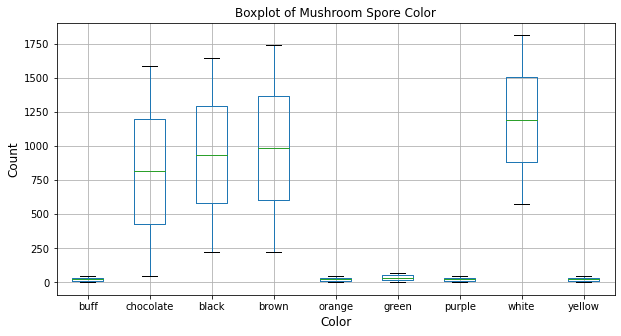

In [32]:
spore_boxplot = S.boxplot(figsize=(10,5))
spore_boxplot = plt.title('Boxplot of Mushroom Spore Color', fontsize=12)
spore_boxplot = plt.ylabel('Count', fontsize=12)
spore_boxplot = plt.xlabel('Color', fontsize=12)

,buff,chocolate,black,brown,orange,green,purple,white,yellow
Edible,,,,,,,,,
poisonous,0.0,1584.0,224.0,224.0,0.0,72.0,0.0,1812.0,0.0
edible,48.0,48.0,1648.0,1744.0,48.0,0.0,48.0,576.0,48.0
Total,48.0,1632.0,1872.0,1968.0,48.0,72.0,48.0,2388.0,48.0


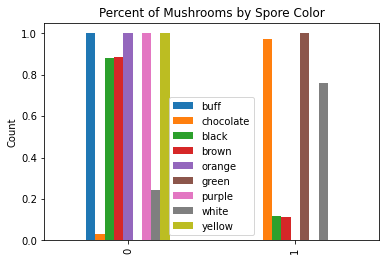

In [33]:
spore = Spercent.plot.bar()
spore = plt.title('Percent of Mushrooms by Spore Color')
spore = plt.ylabel('Count')

#add totals of each column
Stot = S.append(pd.Series(S.sum(),name='Total'))
Stot

### Habitat

The distribution of the habitat variables are illustrated in the boxplot below. This boxplot provides the insight that the majority of mushrooms in this data set are in the woods, grasses, or paths. It is also important to note that there are no outliers in this data. The boxplot below depicts the count of the edible vs. poisonous mushroom by habitat. The bar graph below shows the percentage of the mushrooms that fall in the edible vs. poisonous categories. 88% of the paths, 73% of the urban, 71% of the leaves, 40% of the woods, 34% of the grasses, 12% of the meadows, and 0% of the waste mushrooms are edible.

In [34]:
grouped_hab = grouped.iloc[:,18:25]
H = grouped_hab.rename(columns={'Habitat_d':'woods', 'Habitat_g':'grasses', 
                               'Habitat_l':'leaves', 'Habitat_m':'meadows', 
                               'Habitat_p':'paths','Habitat_u':'urban', 'Habitat_w':'waste'})
H

#append sum of columns as a total row
Htot = H.append(pd.Series(H.sum(),name='Total'))
Htot

,woods,grasses,leaves,meadows,paths,urban,waste
Edible,,,,,,,
0,1268.0,740.0,592.0,36.0,1008.0,272.0,0.0
1,1880.0,1408.0,240.0,256.0,136.0,96.0,192.0
Total,3148.0,2148.0,832.0,292.0,1144.0,368.0,192.0


In [35]:
#calculate percent edible and poison mushrooms for each habitat
Hedible_percent = Htot.iloc[1].values/Htot.iloc[2].values
Hpoison_percent = Htot.iloc[0].values/Htot.iloc[2].values

#combine into one array
Hnumpy_percent = (Hedible_percent, Hpoison_percent)

#add percentages to dataframe with appropriate column names
Hpercent = pd.DataFrame(data=Hnumpy_percent).rename(columns={0:'woods', 1:'grasses', 2:'leaves', 3:'meadows', 4:'paths', 
                                                             5:'urban', 6:'waste'})

print(Hpercent)

      woods   grasses    leaves   meadows     paths    urban  waste
0  0.597205  0.655493  0.288462  0.876712  0.118881  0.26087    1.0
1  0.402795  0.344507  0.711538  0.123288  0.881119  0.73913    0.0


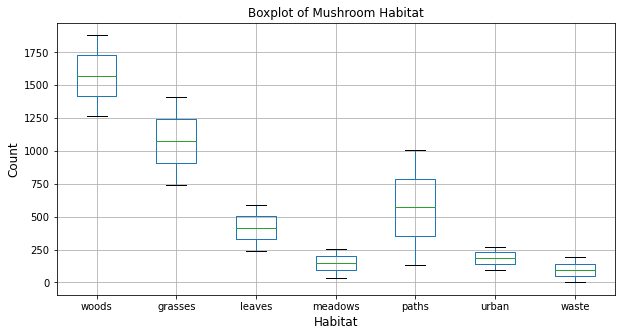

In [36]:
habitat_boxplot = H.boxplot(figsize=(10,5))
habitat_boxplot = plt.title('Boxplot of Mushroom Habitat', fontsize=12)
habitat_boxplot = plt.ylabel('Count', fontsize=12)
habitat_boxplot = plt.xlabel('Habitat', fontsize=12)

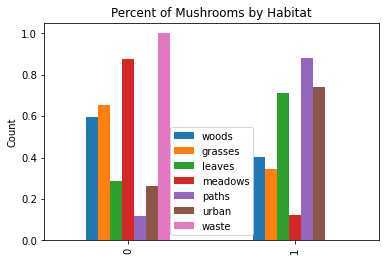

In [37]:
habitat = Hpercent.plot.bar()
habitat = plt.title('Percent of Mushrooms by Habitat')
habitat = plt.ylabel('Count')

## Phase II: Build Predictive Models

Now that we've built our data frame, we're going to run a regression model on it to determine which attribute is the best predictor of whether a given mushroom is poisonous or edible.

In [38]:
# Printing a few rows of df1
df1.head()

,Edible,Odor_a,Odor_c,Odor_f,Odor_l,Odor_m,Odor_n,Odor_p,Odor_s,Odor_y,...,Spore_Color_u,Spore_Color_w,Spore_Color_y,Habitat_d,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


The first step in properly running a regression is to divide the data into training data and testing data. The training data is used to help the model learn, while the testing data is used to ensure the model works.

We placed 50% of our data in the training dataset and 25% of our data in the testing dataset.

In [39]:
# Dividing the data into training and testing data
train = df1[0:4062]
test = df1[4063:6094]

Next, to calculate our null error rate, we will take the training dataset and divide it by the total number of edible mushrooms within the dataset.

In [40]:
# Percentage of edible mushrooms in train
train.Edible.values.sum()/train.shape[0]

0.8188084687346134

Conseuquently, our null error rate is (1 - 0.819) = 0.181, or 18.1%. This is the accuracy we need to beat if we want our model to be successful.
<br>

Next, we need to check for null or missing values in the datasets. If present, they could ruin our model.

In [41]:
# Checking the training dataset for null or missing values
train.isnull().sum()

Edible           0
Odor_a           0
Odor_c           0
Odor_f           0
Odor_l           0
Odor_m           0
Odor_n           0
Odor_p           0
Odor_s           0
Odor_y           0
Spore_Color_b    0
Spore_Color_h    0
Spore_Color_k    0
Spore_Color_n    0
Spore_Color_o    0
Spore_Color_r    0
Spore_Color_u    0
Spore_Color_w    0
Spore_Color_y    0
Habitat_d        0
Habitat_g        0
Habitat_l        0
Habitat_m        0
Habitat_p        0
Habitat_u        0
Habitat_w        0
dtype: int64

In [42]:
# Checking the testing dataset for null or missing values
test.isnull().sum()

Edible           0
Odor_a           0
Odor_c           0
Odor_f           0
Odor_l           0
Odor_m           0
Odor_n           0
Odor_p           0
Odor_s           0
Odor_y           0
Spore_Color_b    0
Spore_Color_h    0
Spore_Color_k    0
Spore_Color_n    0
Spore_Color_o    0
Spore_Color_r    0
Spore_Color_u    0
Spore_Color_w    0
Spore_Color_y    0
Habitat_d        0
Habitat_g        0
Habitat_l        0
Habitat_m        0
Habitat_p        0
Habitat_u        0
Habitat_w        0
dtype: int64

As we can see, there are no null or missing values in neither the training dataset nor the testing dataset.
<br>

Next, we are going to remove the "Edible" variable (our y variable) from the testing dataset. This will allow us to properly test the dataset to determine how accurate our model is.

In [43]:
# Removing the edible variable from the testing dataset
del test['Edible']

Now it's time to build our model. As we can see, due to our dummy variables, there are a lot of variables in our training dataset that could affect whether the mushroom is edible or not. Therefore, we must determine which variables wil be significat for our model and which will not.

To do this, we will use the statsmodel library to get each variable's p value. We will use a signifcance level of 0.05, so any variable that has a p value which is greater than 0.05 will be considered insignificant and removed from the model.

In [44]:
# Using statsmodel library to get p values
results = smf.ols('Edible ~ Odor_a + Odor_c + Odor_f + Odor_l + Odor_m + Odor_n + Odor_p + Odor_s + Odor_y + Spore_Color_b + Spore_Color_h + Spore_Color_n + Spore_Color_o + Spore_Color_r + Spore_Color_u + Spore_Color_w + Spore_Color_y + Habitat_d + Habitat_g + Habitat_l + Habitat_m + Habitat_p + Habitat_u + Habitat_w', data = df1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Edible   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.707e+04
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:43:17   Log-Likelihood:                 9780.1
No. Observations:                8124   AIC:                        -1.951e+04
Df Residuals:                    8101   BIC:                        -1.935e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.846e+09   5.44e+10     -0.144

As we can see from the model above, only the Spore_Color_h, Spore_Color_r, and Spore_Color_w variables have low enough p values for us to consider them statistically significant. Therefore, these are the three variables that we will be including in our model.
<br>

Now we will define our model only using the three aforementioned attributes as explanatory variables. After trying all six possible combinations (3!) of the three variables, we determined that any model containing the variable Spore_Color_h was the most accurate model. In order to make the model run as smoothly as possible, we decided to use the least variables possible. Consequently, the model using only Spore_Color_h is shown below.

In [46]:
# Creating the predictors vector with Spore_Color_h as the predictor variable

predictors = ['Spore_Color_h']

# Creating a subset of the training data using Spore_Color_h
X_train = train[predictors].values

# Creating a subset of the testing data using Spore_Color_h
X_test = test[predictors].values

# Creating a vector with just the response indicator from the training data
y_train = train['Edible'].values

# Declare logistic regression for the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Calculate the model accuracy
model.score(X_train, y_train)

0.8934022648941408

We see that the accuracy of our model is 0.8934, or 89.34%, which is much better than our null error rate of 18.1%. We can therefore conclude that our model is useful.
<br>

To answer our initial question, we belive that Spore_Color_h is the best predictor as to whether a particular mushroom is edible or poisonous. Other good predictors include Spore_Color_r and Spore_Color_w.

## Conclusions

The goal of this project is to answer the question "What attributes from the odor, spor color, and habitat best predict whether a particular mushroom is edible or poisonous?". This question was answered using statistics, graphical analysis, and predictive mdodeling. From this work we concluded that spore color is the attribute that best predicts wheather a mushroom is edible or poisionous. Within the many different spore colors tested in this dataset, the best spore colors to use are spore colors h, r, and w in that order. The predictive model to see whether certain mushrooms are edible or poisionous was sucessful. Our model has an 89.34% accuracy, a considerable improvement from the null error rate of 18.1%. This type of data analysis could be especially useful to food scientists, biologists, researchers working with fungi, and others.